In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Hero\Downloads\nba_final.csv")
df.head()

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,FG.,X3P,X3PA,X3P.,X2P,X2PA,X2P.,eFG.,FT,FTA,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,mean_views,Season,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,0.8,1.9,0.405,0.2,0.5,0.500,0.5,1.5,0.375,0.464,0.4,0.9,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2,NaN,3.320000,2016-17,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,1.9,4.6,0.403,0.7,2.0,0.375,1.1,2.6,0.424,0.483,0.5,0.6,0.800,0.3,0.8,1.1,1.9,0.4,0.1,1.0,1.4,5.0,2700000.0,11.155738,2016-17,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,4.9,10.8,0.454,1.0,3.3,0.288,4.0,7.5,0.528,0.499,2.0,2.7,0.719,1.5,3.6,5.1,1.9,0.8,0.5,1.1,2.2,12.7,4351320.0,1713.986339,2016-17,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,1.3,3.0,0.426,0.2,0.8,0.200,1.1,2.2,0.513,0.454,0.8,1.1,0.737,0.5,1.3,1.8,0.4,0.4,0.4,0.4,1.8,3.5,2022240.0,205.855191,2016-17,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,3.0,7.6,0.393,1.1,3.5,0.330,1.9,4.2,0.445,0.468,1.6,2.2,0.706,1.3,6.1,7.4,1.6,1.0,0.7,1.5,1.7,8.7,7680965.0,604.341530,2016-17,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No


In [200]:
df.columns

Index(['Rk', 'Player.x', 'Player_ID', 'Pos1', 'Pos2', 'Age', 'Tm', 'G', 'GS',
       'MP', 'FG', 'FGA', 'FG.', 'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.',
       'eFG.', 'FT', 'FTA', 'FT.', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Salary', 'mean_views', 'Season', 'Conference',
       'Role', 'Fvot', 'FRank', 'Pvot', 'PRank', 'Mvot', 'MRank', 'Score',
       'Play'],
      dtype='object')

In [201]:
df.shape

(1408, 45)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [203]:
df.drop(columns=["Player_ID"],inplace=True)

In [204]:
obj_cols=df.select_dtypes(include="O").columns.to_list()
print(obj_cols)

['Player.x', 'Pos1', 'Pos2', 'Tm', 'Season', 'Conference', 'Role', 'Play']


In [205]:
df.drop(columns=["Season"],inplace=True)

In [206]:
df.drop(columns=["Conference"],inplace=True)

In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Role"]=le.fit_transform(df["Role"])

In [208]:
df["Play"]=df["Play"].map({"No":0,"Yes":1})

In [209]:
#'Player.x', 'Pos1', 'Pos2', 'Tm'
df["Player.x"]=le.fit_transform(df["Player.x"])

In [210]:
df["Pos1"].unique()

array(['C', 'PG', 'SF', 'PF', 'SG'], dtype=object)

In [211]:
df["Pos1"]=le.fit_transform(df["Pos1"])

In [212]:
#I have checked there are 1396 null values so it is not good for our dataset, so i should drop it.
df.drop(columns=["Pos2"],inplace=True)

In [213]:
df["Tm"]=le.fit_transform(df["Tm"])

In [214]:
obj_lst_new=df.select_dtypes(include="O").columns.to_list()
print(obj_lst_new)

[]


<AxesSubplot:>

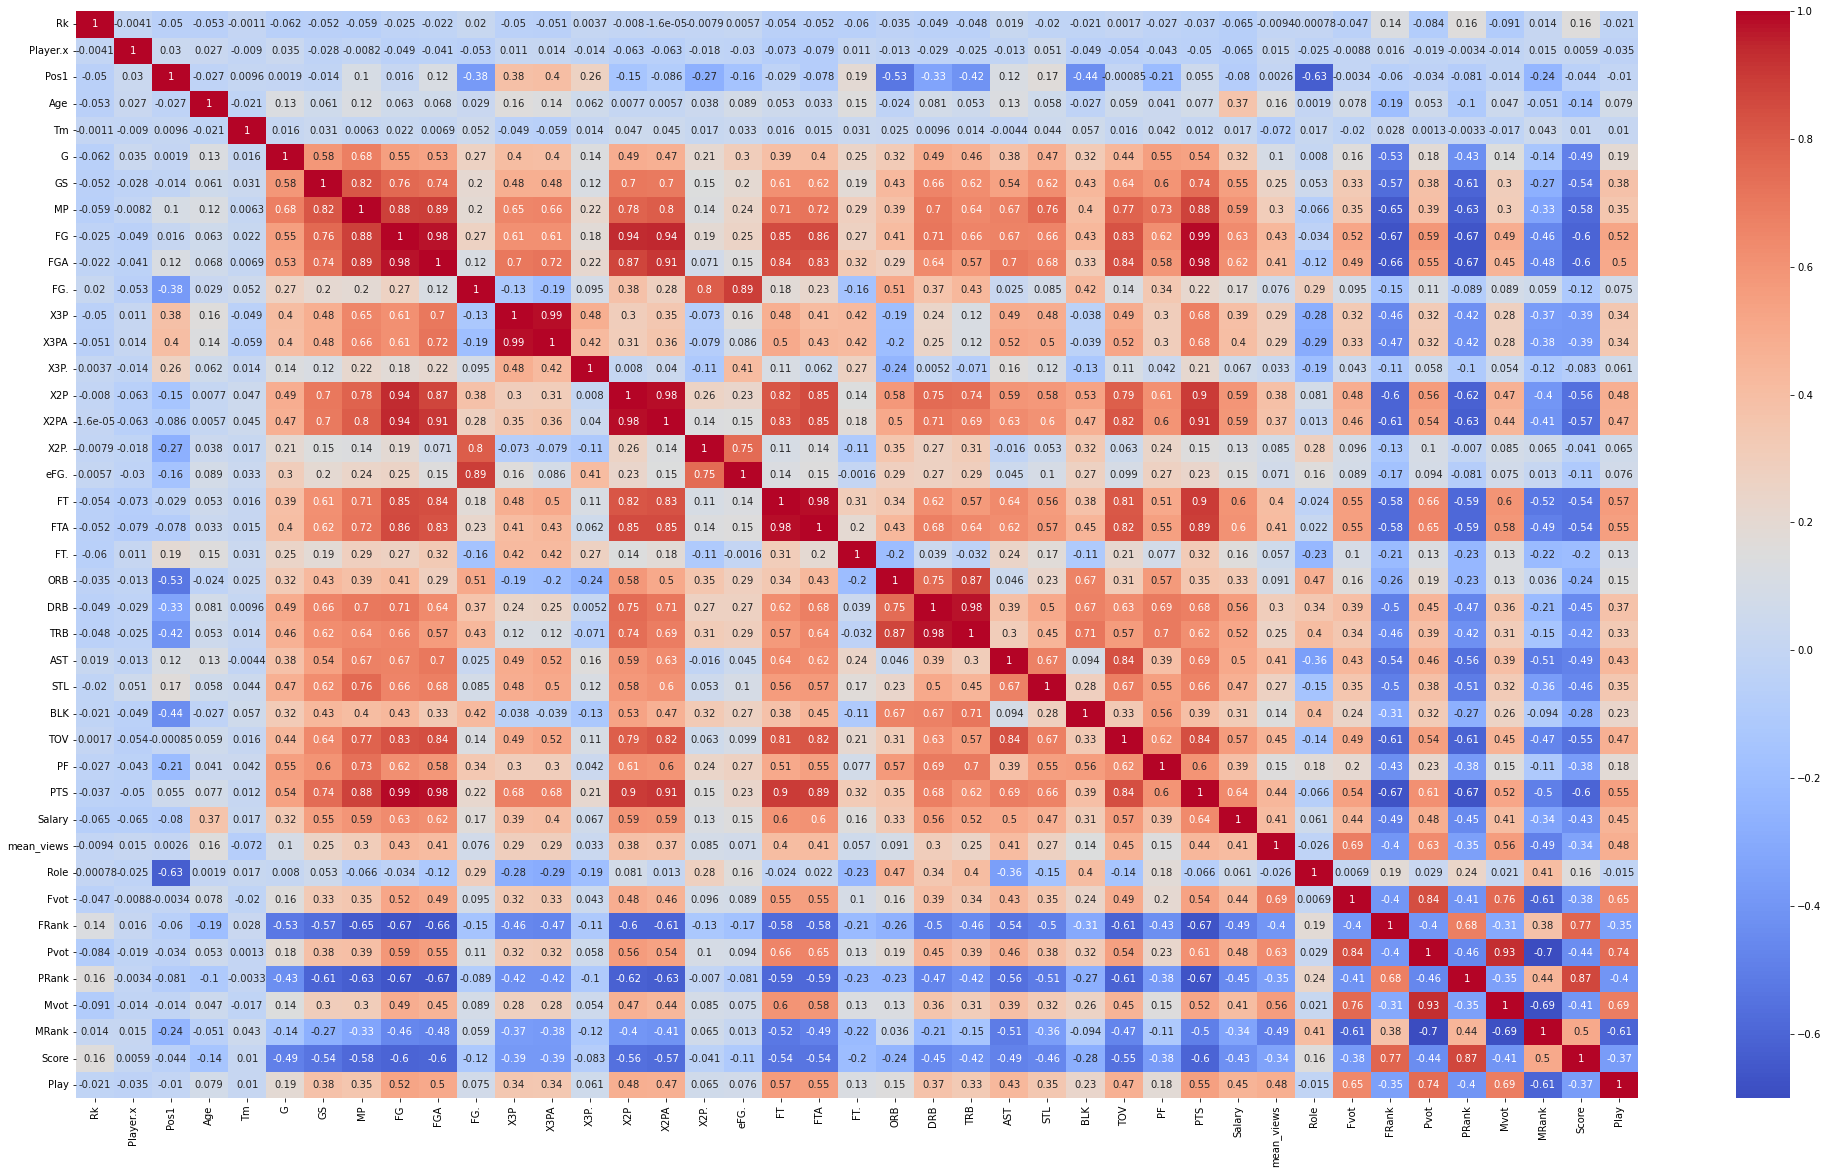

In [215]:
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [216]:
df.isnull().sum()

Rk              0
Player.x        0
Pos1            0
Age             0
Tm              0
G               0
GS              0
MP              0
FG              0
FGA             0
FG.             4
X3P             0
X3PA            0
X3P.           99
X2P             0
X2PA            0
X2P.           15
eFG.            4
FT              0
FTA             0
FT.            47
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Salary         62
mean_views    138
Role            0
Fvot            0
FRank           0
Pvot          159
PRank         159
Mvot          404
MRank         404
Score           0
Play            0
dtype: int64

In [217]:
pd.options.display.max_columns = None

df.describe(include="all")

,Rk,Player.x,Pos1,Age,Tm,G,GS,MP,FG,FGA,FG.,X3P,X3PA,X3P.,X2P,X2PA,X2P.,eFG.,FT,FTA,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,mean_views,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1404.000000,1408.000000,1408.000000,1309.000000,1408.000000,1408.000000,1393.000000,1404.000000,1408.000000,1408.000000,1361.000000,1408.000000,1408.000000,1408.00000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1.346000e+03,1270.000000,1408.000000,1.408000e+03,1408.000000,1249.000000,1249.000000,1004.000000,1004.000000,1408.000000,1408.000000
mean,257.701705,331.396307,2.020597,26.139205,14.424716,54.099432,25.906960,20.162713,3.262429,7.173153,0.447603,0.856250,2.420810,0.312510,2.406321,4.752770,0.496699,0.505387,1.417401,1.855327,0.740834,0.847514,2.824645,3.67017,1.935227,0.640767,0.402699,1.130540,1.726065,8.794176,6.790048e+06,988.802262,0.553267,1.176963e+05,61.595170,8.135308,43.272218,2.938247,7.149402,75.578338,0.051847
std,150.765855,189.834284,1.442674,4.282550,8.616938,24.052508,28.664578,9.066041,2.181694,4.591826,0.091761,0.792307,2.061737,0.127164,1.812374,3.427045,0.093913,0.094782,1.369218,1.678879,0.129571,0.769705,1.853155,2.48246,1.791822,0.416026,0.403687,0.803248,0.751721,6.081955,7.452558e+06,2131.279411,0.497331,4.286272e+05,36.681104,26.427849,23.469147,14.849399,1.498284,41.404980,0.221796
min,1.000000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.684500e+04,1.142857,0.000000,3.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,127.000000,168.750000,1.000000,23.000000,7.000000,36.000000,1.000000,13.300000,1.600000,3.700000,0.404000,0.200000,0.700000,0.286000,1.000000,2.100000,0.454000,0.473000,0.500000,0.700000,0.678000,0.300000,1.500000,1.90000,0.700000,0.300000,0.100000,0.600000,1.200000,4.300000,1.471382e+06,203.573288,0.000000,2.135500e+03,30.000000,0.000000,24.000000,0.000000,6.000000,45.000000,0.000000
50%,257.000000,330.500000,2.000000,25.000000,14.000000,62.000000,13.000000,20.000000,2.800000,6.150000,0.444000,0.700000,2.050000,0.340000,1.900000,3.800000,0.498000,0.510000,1.000000,1.300000,0.765000,0.600000,2.400000,3.10000,1.300000,0.600000,0.300000,0.900000,1.700000,7.300000,3.384298e+06,410.921918,1.000000,6.843000e+03,60.000000,1.000000,43.000000,0.000000,7.000000,69.900000,0.000000
75%,385.250000,497.250000,3.000000,29.000000,22.000000,74.000000,52.000000,27.500000,4.500000,9.900000,0.490000,1.300000,3.700000,0.375000,3.300000,6.700000,0.545000,0.549000,1.900000,2.500000,0.827000,1.100000,3.700000,4.70000,2.500000,0.900000,0.500000,1.500000,2.200000,12.000000,1.043234e+07,930.163431,1.000000,2.925250e+04,90.250000,4.000000,60.000000,0.000000,8.000000,109.200000,0.000000
max,540.000000,659.000000,4.000000,42.000000,29.000000,82.000000,82.000000,37.800000,10.800000,24.500000,1.000000,5.100000,13.200000,1.000000,9.700000,19.200000,1.000000,1.500000,9.700000,11.000000,1.000000,5.400000,11.100000,16.00000,11.200000,2.400000,2.700000,5.700000,4.000000,36.100000,3.745715e+07,34147.961644,1.000000,4.620809e+06,145.000000,269.000000,88.000000,100.000000,9.000000,166.800000,1.000000


In [218]:
df["mean_views"].fillna(df["mean_views"].mean(),inplace=True)

In [219]:
df["eFG."].fillna(df["eFG."].median(),inplace=True)

In [220]:
df["FG."].fillna(df["FG."].median(),inplace=True)

In [221]:
df["X3P."].fillna(df["X3P."].median(),inplace=True)

In [222]:
df["X2P."].fillna(df["X2P."].median(),inplace=True)

In [223]:
df["FT."]=df["FT."].fillna(df["FT."].mean())

In [224]:
df["Mvot"].fillna(df["Mvot"].median(),inplace=True)

In [225]:
df["MRank"].fillna(df["MRank"].median(),inplace=True)

In [226]:
#I am dropping PRank as it has high correlation with score.
df.drop(columns=["PRank"],inplace=True)

In [227]:
#pd.options.display.max_columns = None
df2=df.iloc[:,24:]
#df.isnull().sum()


In [228]:
df2.isnull().sum()

AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Salary         62
mean_views      0
Role            0
Fvot            0
FRank           0
Pvot          159
Mvot            0
MRank           0
Score           0
Play            0
dtype: int64

In [229]:
df["Pvot"].fillna(4,inplace=True)
df.drop(columns=["Salary"],inplace=True)

In [230]:
df.isnull().sum().sum()

0

In [231]:
df.columns

Index(['Rk', 'Player.x', 'Pos1', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG.', 'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT',
       'FTA', 'FT.', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'mean_views', 'Role', 'Fvot', 'FRank', 'Pvot', 'Mvot', 'MRank',
       'Score', 'Play'],
      dtype='object')

In [232]:
#column FG is correlated with so many other so i am removing it
df.drop(columns=["FGA"],inplace=True)

In [233]:
#column FT is correlated with so many other so i am removing it
df.drop(columns=["FTA"],inplace=True)

In [234]:
#column X3P is correlated with so many other so i am removing it
df.drop(columns=["X3PA"],inplace=True)

In [235]:
#column X2P is correlated with so many other so i am removing it
df.drop(columns=["X2PA"],inplace=True)

In [236]:
df.drop(columns=["PTS"],inplace=True)

In [237]:
df.drop(columns=["X2P."],inplace=True)

In [238]:
df.drop(columns=["FT."],inplace=True)

In [239]:
df.drop(columns=["FG."],inplace=True)

In [256]:
df.drop(columns=["TRB"],inplace=True)

In [273]:
df.drop(columns=["Mvot"],inplace=True)

KeyError: "['Mvot'] not found in axis"

In [274]:
df_X=df.iloc[:,:-1]

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_Standard=['Rk', 'Player.x', 'Pos1', 'Age', 'Tm', 'G', 'GS', 'MP', 'FGA', 'X3PA', 'X3P.', 'X2PA', 'eFG.',
       'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'mean_views', 'Role', 'Fvot', 'FRank', 'Pvot', 'MRank',
       'Score']
# fit and transform the dataframe
scaled_df = pd.DataFrame(scaler.fit_transform(df_X), columns=col_Standard)

In [276]:
X=scaled_df
y=df.iloc[:,-1]

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [278]:
#DecisionTree
dt_clf = DecisionTreeClassifier()

In [279]:
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)

In [280]:
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Classifier Accuracy: 0.975177304964539


In [281]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Classifier Accuracy: 0.9893617021276596


In [282]:
scaled_df.shape

(1408, 28)

In [283]:
#Learning RFE
'''
from sklearn.feature_selection import RFE

clf = RandomForestClassifier()
rfe = RFE(clf, n_features_to_select=2)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the ranking of the features
print("Feature ranking:", rfe.ranking_)

# Print the selected features
selected_features = rfe.support_
print("Selected features:", selected_features)

# Use the selected features to train a logistic regression classifier
clf.fit(X_train[:, selected_features], y_train)
y_pred = clf.predict(X_test[:, selected_features])

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

'\nfrom sklearn.feature_selection import RFE\n\nclf = RandomForestClassifier()\nrfe = RFE(clf, n_features_to_select=2)\n\n# Fit the RFE object to the training data\nrfe.fit(X_train, y_train)\n\n# Print the ranking of the features\nprint("Feature ranking:", rfe.ranking_)\n\n# Print the selected features\nselected_features = rfe.support_\nprint("Selected features:", selected_features)\n\n# Use the selected features to train a logistic regression classifier\nclf.fit(X_train[:, selected_features], y_train)\ny_pred = clf.predict(X_test[:, selected_features])\n\n# Calculate the accuracy of the classifier\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [284]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
rf_clf = RandomForestClassifier()

# Create an LDA object
lda = LinearDiscriminantAnalysis()

# Fit the LDA object to the training data
lda.fit(X_train, y_train)

# Transform the training and test data using the LDA object
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Train a classifier on the transformed data
rf_clf.fit(X_train_lda, y_train)

# Evaluate the classifier on the test set
score = rf_clf.score(X_test_lda, y_test)

In [285]:
score

0.975177304964539

In [286]:
#Here i am not understanding that why i am getting a good accuracy over normal code while i do not apply any feature selection methos.

<AxesSubplot:>

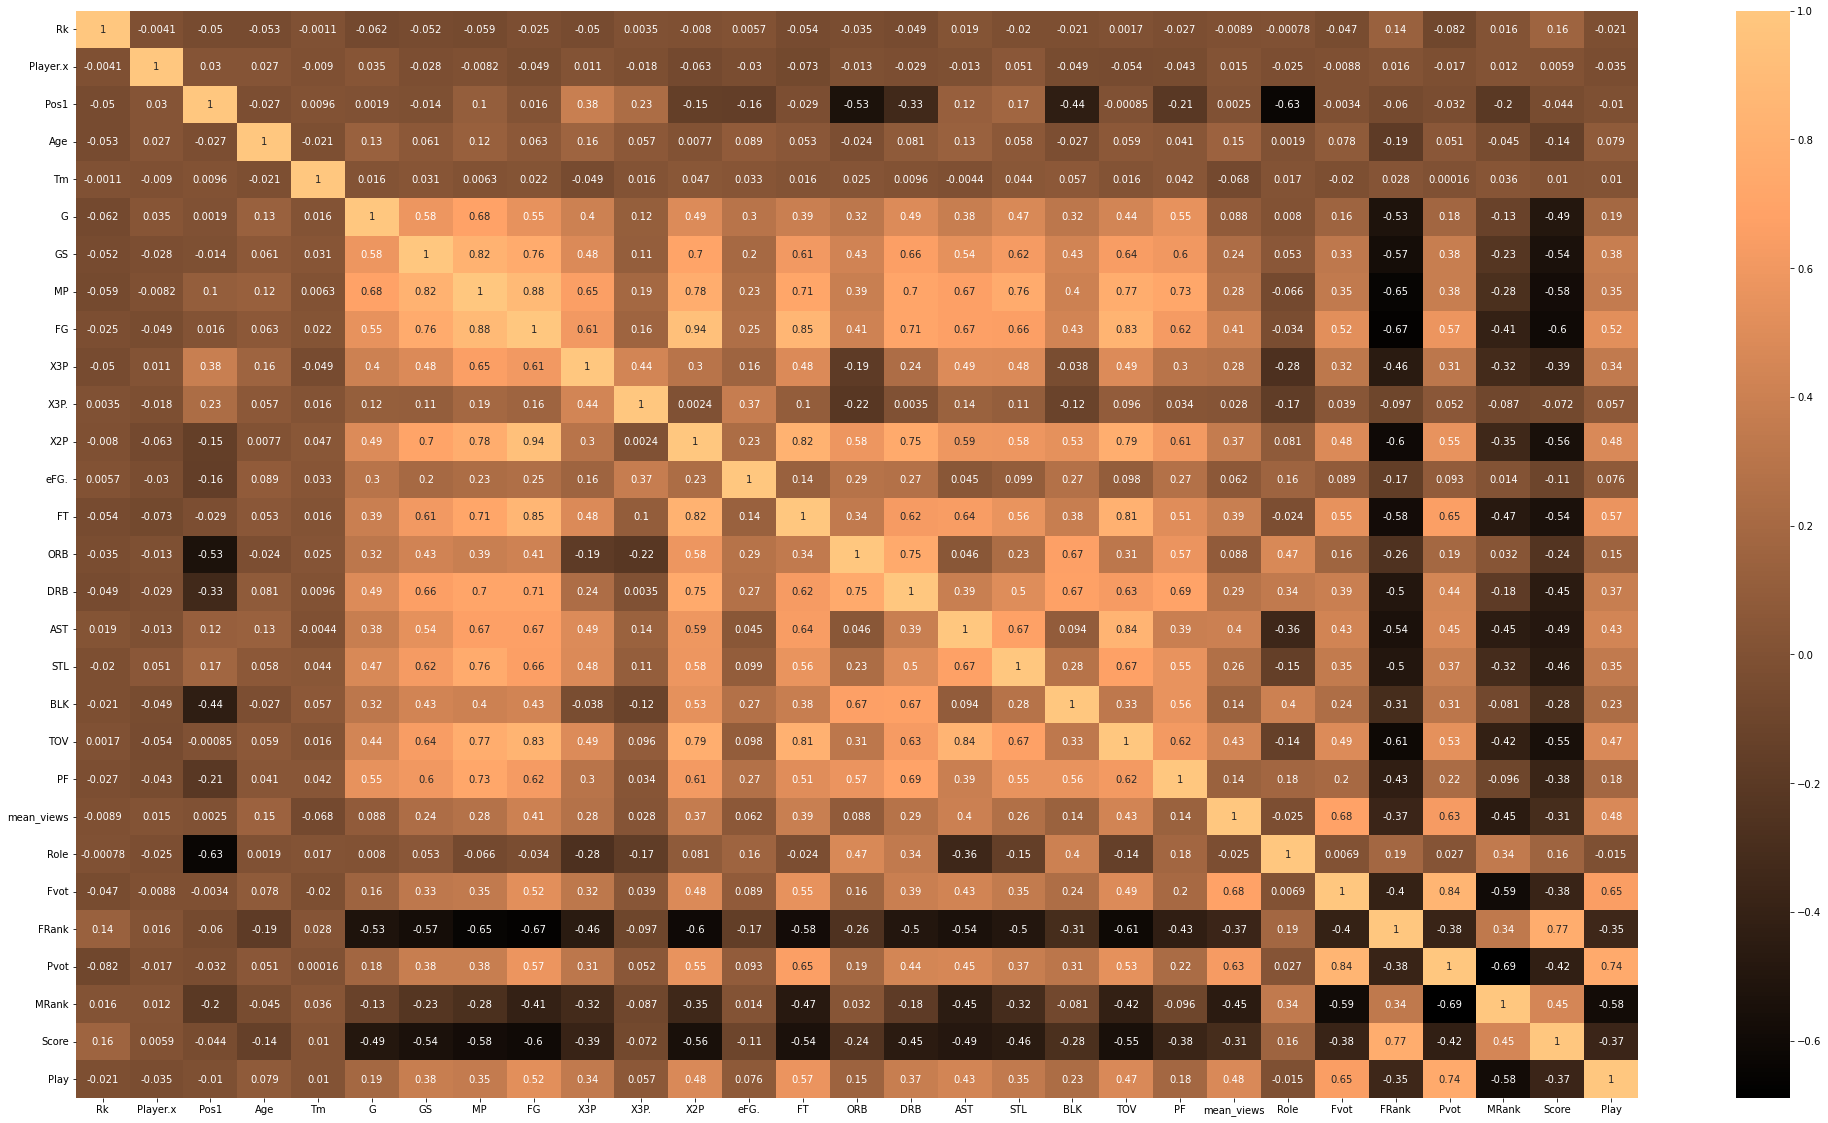

In [287]:
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True,cmap="copper")